In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate


class Fitzhugh_Nagumo(object):
    ''' Class inlcuding model and simulation of Fitzhugh_Nagumo model
    '''

    def __init__(self):
        self.I_inj = 0.34
        self.a = 0.7
        self.b = 0.8
        self.c = 10

        # state variables
        # membrane potential
        self.V_m = 2.0

        # recovery constant
        self.w = 1.0

        self.t_0 = np.arange(0.0, 1000, 0.01)

        # time to simulate over
    pass

    def Fitzhugh_Nagumo_model(self, y0, t, parameters):
        """Fitzhugh_Nagumo model
        V = membrane voltage
        w = recovery variable
        """

        self.V_m, self.w = y0
        self.a, self.b, self.c = parameters

        dvdt = (self.V_m - self.w - np.power(self.V_m,3)/3 + self.I_inj)

        dwdt = (self.V_m + self.a - (self.b * self.w)) / self.c
        
        return [dvdt, dwdt]
        
    def Fitzhugh_Nagumo_model_inj(self, y0, t, parameters):
        """Fitzhugh_Nagumo model
        V = membrane voltage
        w = recovery variable
        """

        self.V_m, self.w = y0
        self.a, self.b, self.c, I_inj = parameters

        dvdt = (self.V_m - self.w - np.power(self.V_m,3)/3 + self.I_inj)

        dwdt = (self.V_m + self.a - (self.b * self.w)) / self.c
        

        return [dvdt, dwdt]
    
    def simulate_inj(self, I_inj):
        """Solve the Fitzhugh-Nagumo model

        """
        
        self.I_inj = I_inj
        
        y0 = [self.V_m, self.w]
        parameters = [self.a, self.b, self.c, self.I_inj]

        sol = integrate.odeint(self.Fitzhugh_Nagumo_model_inj, y0, self.t_0, args=(parameters,))

        return sol

    def simulate(self):
        """Solve the Fitzhugh-Nagumo model

        """
                
        y0 = [self.V_m, self.w]
        parameters = [self.a, self.b, self.c]

        sol = integrate.odeint(self.Fitzhugh_Nagumo_model, y0, self.t_0, args=(parameters,))

        return sol


In [112]:
model = Fitzhugh_Nagumo()

In [119]:
sol = model.simulate_inj(0.35)

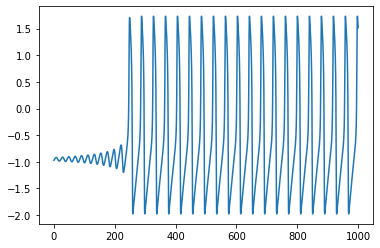

In [120]:
plt.plot(model.t_0, sol[:,0])
plt.show()

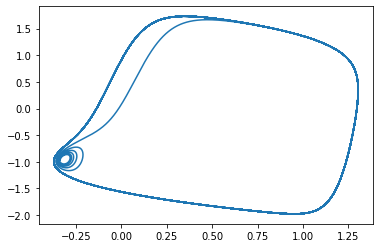

In [57]:
v = sol[:,0]
u = sol[:,1]
plt.plot(u,v)